In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Crei un dataframe Pandas contenente le informazioni presenti nella collection


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/wtitze/4E/main/ristoranti.csv")
df

,N,address,borough,cuisine,grades,name,restaurant_id
0,0,"{'building': '8825', 'coord': [-73.8803827, 40...",Queens,American,"[{'date': datetime.datetime(2014, 11, 15, 0, 0...",Brunos On The Boulevard,40356151
1,1,"{'building': '156-71', 'coord': [-73.840437, 4...",Queens,Pizza/Italian,"[{'date': datetime.datetime(2014, 10, 29, 0, 0...",New Park Pizzeria & Restaurant,40364744
2,2,"{'building': '6409', 'coord': [-74.00528899999...",Brooklyn,American,"[{'date': datetime.datetime(2014, 7, 18, 0, 0)...",Regina Caterers,40356649
3,3,"{'building': '2491', 'coord': [-74.1459332, 40...",Staten Island,Delicatessen,"[{'date': datetime.datetime(2015, 1, 9, 0, 0),...",Bagels N Buns,40363427
4,4,"{'building': '56', 'coord': [-74.004758, 40.74...",Manhattan,American,"[{'date': datetime.datetime(2014, 6, 10, 0, 0)...",Old Homestead,40364715
...,...,...,...,...,...,...,...
25354,25354,"{'building': 'ONE', 'coord': [-81.664363600000...",Queens,Other,[],Camden Food Express,50018316
25355,25355,"{'building': '700', 'coord': [-73.988230600000...",Manhattan,Other,[],Wooly'S Nyc,50018495
25356,25356,"{'building': '2144', 'coord': [-73.9552561, 40...",Manhattan,Other,[],Rafi 786,50018553
25357,25357,"{'building': '1448', 'coord': [-73.93032629999...",Brooklyn,Other,[],NaN,50018721


Elimini tutte le colonne ad esclusione di ‘borough’, ‘cuisine’ e ‘name’


In [ ]:
df.drop(columns = ["N", "address", "grades", "restaurant_id"], inplace = True)
df

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,Pizza/Italian,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,Delicatessen,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,Other,Camden Food Express
25355,Manhattan,Other,Wooly'S Nyc
25356,Manhattan,Other,Rafi 786
25357,Brooklyn,Other,NaN


In [ ]:
df.filter(items=["borough", "cuisine", "name"])

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,Pizza/Italian,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,Delicatessen,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,Other,Camden Food Express
25355,Manhattan,Other,Wooly'S Nyc
25356,Manhattan,Other,Rafi 786
25357,Brooklyn,Other,NaN


Conti il numero di ristoranti che hanno ‘Missing’ come quartiere


In [ ]:
df[df["borough"] == "Missing"].count()["borough"]

51

Sostituisca alla parola ‘Missing’ il valore null


In [ ]:
df["borough"] = df["borough"].replace("Missing", np.NaN)
df

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,Pizza/Italian,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,Delicatessen,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,Other,Camden Food Express
25355,Manhattan,Other,Wooly'S Nyc
25356,Manhattan,Other,Rafi 786
25357,Brooklyn,Other,NaN


Elimini dal dataframe tutti i ristoranti di cui non si conosce il quartiere


In [ ]:
#df.dropna(subset = ["borough"], inplace = True)
#df = df.drop(df[(df["borough"].isnull())].index)
df.count()

borough    25308
cuisine    25359
name       25208
dtype: int64

Calcoli il numero di ristoranti per ogni cucina. Ordinare in ordine decrescente a partire dal tipo di cucina che ha più ristoranti


In [ ]:
df.groupby("cuisine")["name"].count().sort_values(ascending=False)

cuisine
American           6183
Chinese            2418
Café/Coffee/Tea    1214
Pizza              1163
Italian            1069
                   ... 
Iranian               2
Chilean               1
Californian           1
Polynesian            1
Creole/Cajun          1
Name: name, Length: 85, dtype: int64

In [ ]:
df["cuisine"].value_counts()

American           6183
Chinese            2418
Café/Coffee/Tea    1214
Pizza              1163
Italian            1069
                   ... 
Iranian               2
Creole/Cajun          1
Chilean               1
Polynesian            1
Californian           1
Name: cuisine, Length: 85, dtype: int64

Visualizzi il tipo di cucina con più ristoranti


In [ ]:
df.groupby('cuisine')['name'].count()[df.groupby('cuisine')['name'].count()==df.groupby('cuisine')['name'].count().max()]
#c = df.groupby("cuisine").count().reset_index()
#c[c["name"] == c["name"].max()]["cuisine"]
#df["cuisine"].value_counts().sort_values(ascending=False).index[0]

cuisine
American    6183
Name: name, dtype: int64

Visualizzi un grafico a barre con i primi 10 tipi di cucina


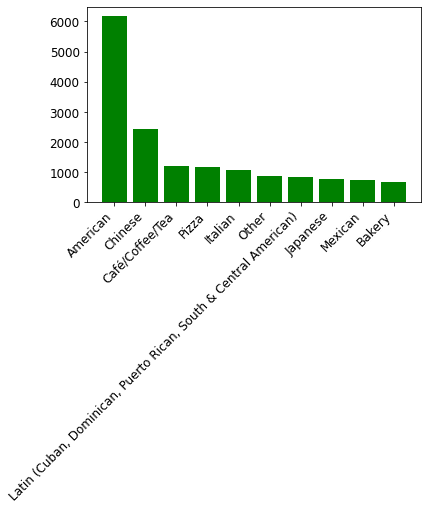

In [ ]:
df4 = df.groupby("cuisine", as_index=False)["name"].count().sort_values("name", ascending=False)

fig = plt.figure()
ax = plt.axes()
fig.autofmt_xdate(rotation=45)
ax.bar(df4["cuisine"].head(10), df4["name"].head(10), color = "green")
plt.show()

Calcoli il numero di ristoranti per ogni quartiere


In [ ]:
df5 = df.groupby("borough", as_index=False)["name"].count()
df5

,borough,name
0,Bronx,2322
1,Brooklyn,6046
2,Manhattan,10211
3,Queens,5615
4,Staten Island,963


Visualizzi i dati precedenti in un grafico a torta


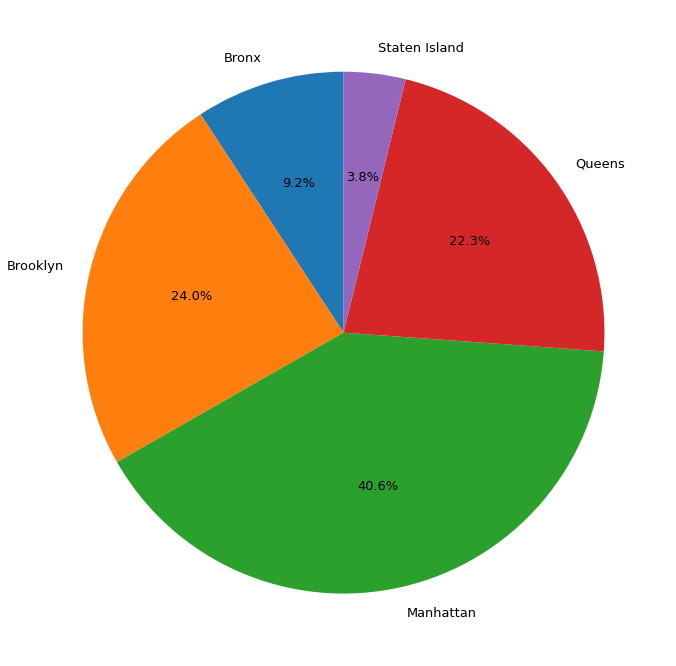

In [ ]:
fig = plt.figure(figsize = (12,12))
ax = plt.axes()
plt.rcParams.update({"font.size" : 13})
ax.pie(df5["name"], labels = df5["borough"], autopct = "%.1f%%", startangle = 90)
#ax.pie(df5.values, labels = df5.index, autopct = "%.1f%%", startangle = 90) #se non si usa as_index nel df5
plt.show()

Visualizzi i due grafici affiancati. Dare titoli appropriati ad entrambi i grafici. 


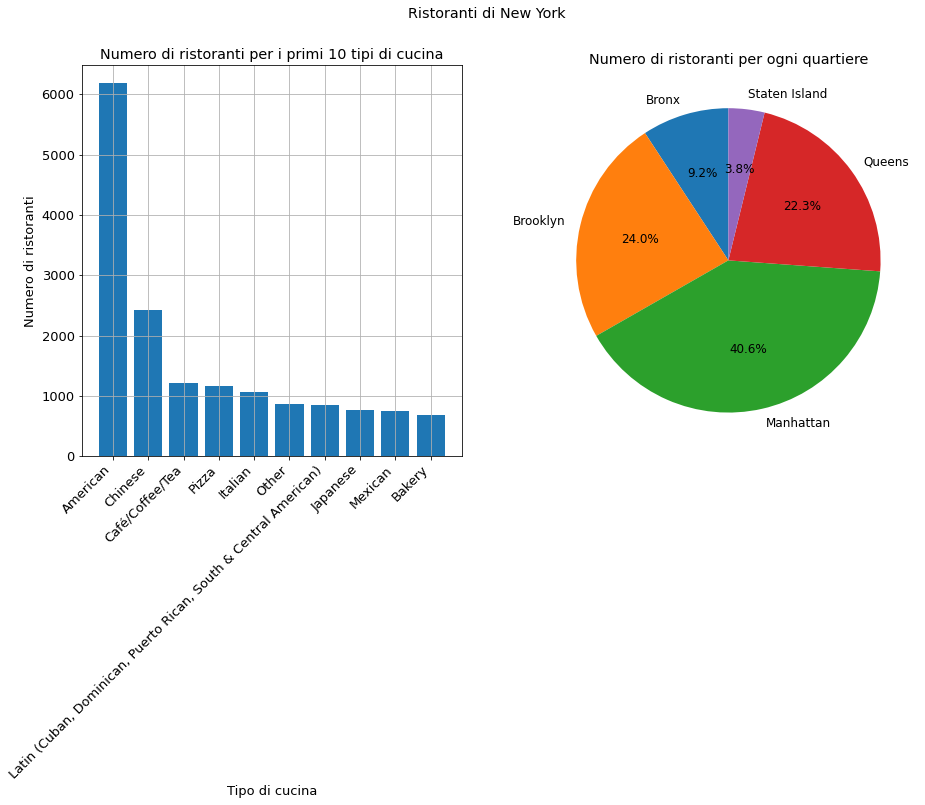

In [ ]:
#creazione della figura
fig,(ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(15,8)
plt.rcParams.update({"font.size" : 12})
fig.autofmt_xdate(rotation=45)

#creazione dei due grafici
ax1.bar(df4["cuisine"].head(10), df4["name"].head(10))
ax2.pie(df5["name"], labels = df5["borough"], autopct = "%.1f%%", startangle = 90)

#settaggio dei vari titoli dei grafici
ax1.set_xlabel('Tipo di cucina')
ax1.set_ylabel('Numero di ristoranti')
ax1.set_title("Numero di ristoranti per i primi 10 tipi di cucina")
ax2.set_title("Numero di ristoranti per ogni quartiere")
fig.suptitle('Ristoranti di New York')
ax1.grid()
plt.show()

Crei un nuovo dataframe sostituendo la parola 'non American' a tutti i tipi di cucina che non sono americani


In [ ]:
df6 = df
df6["cuisine"][df6["cuisine"] != "American"] = "non American"
df6

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,non American,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,non American,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,non American,Camden Food Express
25355,Manhattan,non American,Wooly'S Nyc
25356,Manhattan,non American,Rafi 786
25357,Brooklyn,non American,NaN


Visualizzi, per ogni quartiere, il numero di ristoranti di cucina americana e non americana. Il risultato deve essere il seguente:


In [ ]:
df7 = df6.groupby(["borough", "cuisine"]).count()
df7

name
borough       cuisine           
Bronx         American       411
              non American  1911
Brooklyn      American      1273
              non American  4773
Manhattan     American      3205
              non American  7006
Queens        American      1040
              non American  4575
Staten Island American       244
              non American   719

crei un nuovo dataframe che abbia una colonna che contiene i ristoranti di 
cucina americana e una colonna che contiene il numero di ristoranti che propongono cucine non americane. Il risultato deve essere il seguente:


In [ ]:
df8 = df7["name"].unstack()
df8

cuisine,American,non American
borough,,
Bronx,411,1911
Brooklyn,1273,4773
Manhattan,3205,7006
Queens,1040,4575
Staten Island,244,719


resetti l'indice in modo da avere le tre colonne necessarie per costruire un grafico a barre. Il risultato deve essere il seguente:


In [ ]:
df9 = df8.reset_index()
df9

cuisine,borough,American,non American
0,Bronx,411,1911
1,Brooklyn,1273,4773
2,Manhattan,3205,7006
3,Queens,1040,4575
4,Staten Island,244,719


Visualizzi un istogramma in cui per ogni quartiere si visualizzi una barra con il numero dei ristoranti americani ed una per quelli non americani. Il risultato deve essere il seguente:


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if __name__ == '__main__':


ValueError: ignored

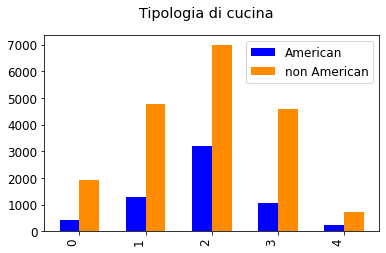

In [ ]:
fig = plt.figure(figsize=(6,4)) 
ax = plt.axes()
ax.bar(df9.index-0.15,df9["American"],label="American",width=0.3,color="blue")
ax.bar(df9.index+0.15,df9["non American"],label="non American",width=0.3,color="#ff8c00")
fig.autofmt_xdate(rotation=90)
fig.suptitle("Tipologia di cucina")
ax.legend(loc=0)
x = np.arange(len(df9["borough"]))
ax.set_xticks(x, df9["borough"])
plt.show()